EDA & Data Preparation

In [161]:
import warnings
warnings.filterwarnings('ignore')

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
data_file_path = '/Users/Faisal/Development/MLData/weather_history.csv'
data = pd.read_csv(data_file_path)

In [164]:
# checking the head of the dataset
data.head()

,Humidity,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,0.89,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,0.86,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,0.89,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,0.83,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,0.83,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [165]:
# checking the shape of the dataset
data.shape

(96453, 12)

In [166]:
# Checking information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Humidity                  96453 non-null  float64
 1   Formatted Date            96453 non-null  object 
 2   Summary                   96453 non-null  object 
 3   Precip Type               95936 non-null  object 
 4   Temperature (C)           96453 non-null  float64
 5   Apparent Temperature (C)  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [167]:
data.describe()

,Humidity,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,0.734899,11.932678,10.855029,10.810640,187.509232,10.347325,0.0,1003.235956
std,0.195473,9.551546,10.696847,6.913571,107.383428,4.192123,0.0,116.969906
min,0.000000,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.600000,4.688889,2.311111,5.828200,116.000000,8.339800,0.0,1011.900000
50%,0.780000,12.000000,12.000000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,0.890000,18.838889,18.838889,14.135800,290.000000,14.812000,0.0,1021.090000
max,1.000000,39.905556,39.344444,63.852600,359.000000,16.100000,0.0,1046.380000


Remove unwanted columns

In [168]:
data['Loud Cover'].value_counts()

0.0    96453
Name: Loud Cover, dtype: int64

In [169]:
# all the rows of Loud Cover column have zero value, so we will remove it
data.drop('Loud Cover', axis=1, inplace=True)

# removed Formatted Date, Daily Summary & Summary as they are not necessary
data.drop(['Formatted Date', 'Daily Summary', 'Summary'], axis=1, inplace=True)

data

,Humidity,Precip Type,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0.89,rain,9.472222,7.388889,14.1197,251.0,15.8263,1015.13
1,0.86,rain,9.355556,7.227778,14.2646,259.0,15.8263,1015.63
2,0.89,rain,9.377778,9.377778,3.9284,204.0,14.9569,1015.94
3,0.83,rain,8.288889,5.944444,14.1036,269.0,15.8263,1016.41
4,0.83,rain,8.755556,6.977778,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
96448,0.43,rain,26.016667,26.016667,10.9963,31.0,16.1000,1014.36
96449,0.48,rain,24.583333,24.583333,10.0947,20.0,15.5526,1015.16
96450,0.56,rain,22.038889,22.038889,8.9838,30.0,16.1000,1015.66
96451,0.60,rain,21.522222,21.522222,10.5294,20.0,16.1000,1015.95


In [170]:
# check if there is any null value in the dataset
data.isnull().sum()

Humidity                      0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
dtype: int64

In [171]:
data['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [172]:
# Fill missing Precip Type values with rain
data['Precip Type'].fillna(method='ffill', inplace=True, axis=0)
data['Precip Type'].value_counts()

rain    85741
snow    10712
Name: Precip Type, dtype: int64

We want to Predict: Humidity

Box Plot

In [173]:
# Using one hot encoder for Precip Type
precipitation_array = pd.get_dummies(data['Precip Type'])
data = pd.concat([data, precipitation_array], axis=1)
data.drop('Precip Type', axis=1, inplace=True)
data.head()

,Humidity,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),rain,snow
0,0.89,9.472222,7.388889,14.1197,251.0,15.8263,1015.13,1,0
1,0.86,9.355556,7.227778,14.2646,259.0,15.8263,1015.63,1,0
2,0.89,9.377778,9.377778,3.9284,204.0,14.9569,1015.94,1,0
3,0.83,8.288889,5.944444,14.1036,269.0,15.8263,1016.41,1,0
4,0.83,8.755556,6.977778,11.0446,259.0,15.8263,1016.51,1,0


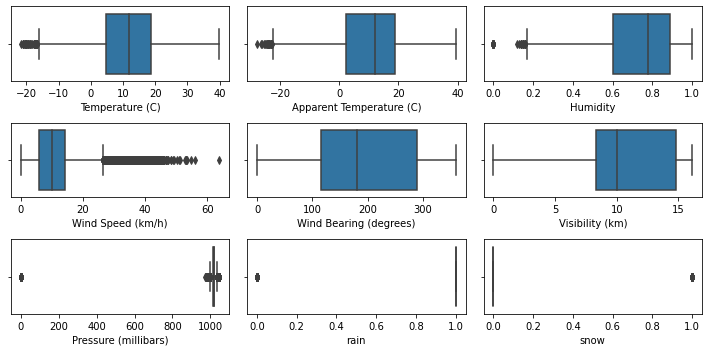

In [174]:
# creating plot layout
fig_box, axs_box = plt.subplots(3, 3, figsize=(10, 5))

# creating actual box plot
sns.boxplot(data['Temperature (C)'], ax = axs_box[0,0])
sns.boxplot(data['Apparent Temperature (C)'], ax = axs_box[0,1])
sns.boxplot(data['Humidity'], ax = axs_box[0,2])
sns.boxplot(data['Wind Speed (km/h)'], ax = axs_box[1,0])
sns.boxplot(data['Wind Bearing (degrees)'], ax = axs_box[1,1])
sns.boxplot(data['Visibility (km)'], ax = axs_box[1,2])
sns.boxplot(data['Pressure (millibars)'], ax = axs_box[2,0])
sns.boxplot(data['rain'], ax = axs_box[2,1])
sns.boxplot(data['snow'], ax = axs_box[2,2])
plt.tight_layout()

Scatter Plot

<AxesSubplot:xlabel='snow', ylabel='Humidity'>

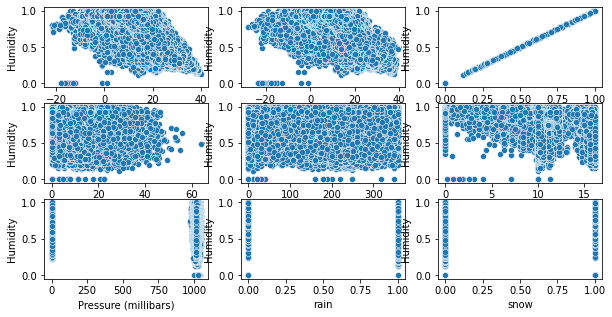

In [175]:
fig_scat, axs_scat = plt.subplots(3, 3, figsize=(10, 5))
sns.scatterplot(data=data, x='Temperature (C)', y='Humidity', ax=axs_scat[0, 0])
sns.scatterplot(data=data, x='Apparent Temperature (C)', y='Humidity', ax=axs_scat[0, 1])
sns.scatterplot(data=data, x='Humidity', y='Humidity', ax=axs_scat[0, 2])
sns.scatterplot(data=data, x='Wind Speed (km/h)', y='Humidity', ax=axs_scat[1, 0])
sns.scatterplot(data=data, x='Wind Bearing (degrees)', y='Humidity', ax=axs_scat[1, 1])
sns.scatterplot(data=data, x='Visibility (km)', y='Humidity', ax=axs_scat[1, 2])
sns.scatterplot(data=data, x='Pressure (millibars)', y='Humidity', ax=axs_scat[2, 0])
sns.scatterplot(data=data, x='rain', y='Humidity', ax=axs_scat[2, 1])
sns.scatterplot(data=data, x='snow', y='Humidity', ax=axs_scat[2, 2])

Find Co-relation among Features

In [176]:
# split data into features and target
X = data.iloc[:,1:]
Y = data.iloc[:,0]
X.corr()

,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),rain,snow
Temperature (C),1.000000,0.992629,0.008957,0.029988,0.392847,-0.005447,0.562620,-0.562620
Apparent Temperature (C),0.992629,1.000000,-0.056650,0.029031,0.381718,-0.000219,0.565207,-0.565207
Wind Speed (km/h),0.008957,-0.056650,1.000000,0.103822,0.100749,-0.049263,0.067928,-0.067928
Wind Bearing (degrees),0.029988,0.029031,0.103822,1.000000,0.047594,-0.011651,0.041984,-0.041984
Visibility (km),0.392847,0.381718,0.100749,0.047594,1.000000,0.059818,0.312875,-0.312875
Pressure (millibars),-0.005447,-0.000219,-0.049263,-0.011651,0.059818,1.000000,-0.009008,0.009008
rain,0.562620,0.565207,0.067928,0.041984,0.312875,-0.009008,1.000000,-1.000000
snow,-0.562620,-0.565207,-0.067928,-0.041984,-0.312875,0.009008,-1.000000,1.000000


In [177]:
# Split the dataset into 80:20 for training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [178]:
# Train Linear Regression
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train, Y_train)
linear_regression.predict(X_test)
linear_regression.score(X_test, Y_test)

0.504062802222351

In [179]:
# Train DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(random_state=1)
decision_tree_regressor.fit(X_train, Y_train)
decision_tree_regressor.predict(X_test)
decision_tree_regressor.score(X_test, Y_test)

0.49419367606248354

In [180]:
# K nearest neighbor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, Y_train)
knn.predict(X_test)
knn.score(X_test, Y_test)

0.6294025141968637

In [181]:
# Ridge Regressor
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, Y_train)
ridge.predict(X_test)
ridge.score(X_test, Y_test)

0.5040627004858665

In [182]:
# Elastic Net
from sklearn.linear_model import ElasticNet
esn = ElasticNet(random_state=0)
esn.fit(X_train, Y_train)
esn.predict(X_test)
esn.score(X_test, Y_test)

0.31971489591758184

In [183]:
# Artificial Neural Network
from sklearn.neural_network import MLPRegressor
ann = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 4), random_state=1)
ann.fit(X_train, Y_train)
ann.predict(X_test)
ann.score(X_test, Y_test)

0.48550329677907

In [184]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=10, random_state=1)
random_forest.fit(X_train, Y_train)
random_forest.predict(X_test)
random_forest.score(X_test, Y_test)

0.715814854610318

In [185]:
# Voting Regressor
from sklearn.ensemble import VotingRegressor
voting_regressor = VotingRegressor([('lr', LinearRegression()),
                                 ('knn', KNeighborsRegressor(n_neighbors=7)),
                                 ('rdg', Ridge()),
                                 ('rf', RandomForestRegressor(n_estimators=10, random_state=1)),
                                 ('dt', DecisionTreeRegressor(random_state=1))])
voting_regressor.fit(X_train, Y_train)
voting_regressor.predict(X_test)
voting_regressor.score(X_test, Y_test)

0.6817715732745427

In [186]:
# AutoML with TPOT
# from tpot import TPOTRegressor
# tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
# tpot.fit(X_train, Y_train)
# tpot.score(X_test, Y_test)
# tpot.export('tpot_humidity_prediction.py')

In [187]:
# Grid Search on Random Forest for Hyperparameter tuning
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

param_grid = {'max_depth': [3, 5, 10],
              'min_samples_split': [2, 5, 10],
              'random_state': [0, 1]}
base_estimator = RandomForestRegressor()
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                         factor=2, resource='n_estimators',
                         max_resources=30).fit(X_train, Y_train)
sh.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=16, random_state=1)

In [191]:
# Grid Search on KNN Regrassor for Hyperparameter tuning
knn_halving = HalvingGridSearchCV(KNeighborsRegressor(),
                         {'n_neighbors': [2, 3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}).fit(X_train, Y_train)
knn_halving.best_estimator_

KNeighborsRegressor(n_neighbors=6, weights='distance')

In [192]:
# Optimized KNN
optimized_knn = KNeighborsRegressor(n_neighbors=6, weights='distance')
optimized_knn.fit(X_train, Y_train)
optimized_knn.predict(X_test)
optimized_knn.score(X_test, Y_test)

0.6326428823705712